In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
import os
import matplotlib as mpl
if os.environ.get('DISPLAY', '') == '':
    print('no display found. Using non-interactive Agg backend')
#     mpl.use('Agg')
import future.utils
mpl.rcParams["text.usetex"] = False
sns.set_style("whitegrid")
sns.axes_style("whitegrid")
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
import json
import numpy as np
import pickle
from tqdm import tqdm 
import networkx as nx
path_to_local_libs = 'C:\\Users\\valen\\Documents\\GitHub\\Lib\\'
import networkx as nx
try:
    import ndlib_local.ndlib.models.ModelConfig as mc
    import ndlib_local.ndlib.models.opinions as op
except ModuleNotFoundError:
    import sys
    sys.path.insert(0,path_to_local_libs)
    import ndlib_local.ndlib.models.ModelConfig as mc
    import ndlib_local.ndlib.models.opinions as op
import warnings
import json
import os.path
warnings.filterwarnings("ignore")


no display found. Using non-interactive Agg backend


# Funzione plot deffuant

In [78]:
def plotdeffuant(results, measure,stdmeasure, modelname):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    
    params = ['graph','nruns','n', 'k','gam','eps', 'pr', 'avg_nit', 'avg_ncluster_01', 'avg_ncluster_001', 'avg_ncluster_00001', 'avg_mean_opinion', 'avg_std_opinions', 'avg_median_opinion', 'avg_entr_10B', '10B_avg_norm_entr']
    paramsnames = ['graph', 'nruns', 'n', 'k', '$\gamma$', '$\epsilon$', '$p_r$', 'Avg. N. Iterations', 'Avg. N. Clusters', 'Avg. N. Clusters', 'Avg. N. Clusters', 'Avg. Mean Op.', 'Avg. Std Op.', 'Avg Median Op.', 'Avg. Entropy', 'Avg. Norm. Entr.']
    parmapping = dict(zip(params, paramsnames))

    sns.set_style("whitegrid")
    sns.set(font_scale=1.5)

    with sns.axes_style("whitegrid"):

        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), dpi=600)
        fmt = ".2f"
        annot = True
        if measure=='avg_nit':
            fmt = ".0f"
            fs = 18
        else:
            fs = 20

        list_of_labels = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]
        lab = 0
        i = 0
        colors = ['b', 'g', 'r']
        
        for val in ['er', 'ba']:
            data = results[results['gam']==0.0]
            data2 = data[data['graph'] == val]
            df = data2.pivot("eps", "pr", measure)
            a=sns.heatmap(df, vmin=min(data[measure]), vmax=max(data[measure]), cmap='RdBu_r', cbar=False, fmt=fmt, annot=annot, annot_kws={"size": fs}, ax= axes[0,i])
            axes[0,i].set_xlabel(r'{}'.format(parmapping["pr"]), fontsize=20)
            axes[0,i].set_title(r'({}) {}'.format(list_of_labels[lab], val.upper()), fontsize=20, pad=20)
            axes[0,i].set_ylabel(r'{}'.format(parmapping['eps']))
            i+=1
        
        for ax in axes[0,:].flat:
            ax.tick_params(axis='x', which='major', pad=-2)
            ax.tick_params(axis='y', which='major', pad=-2)
        
        
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.1)
        cbar = fig.colorbar(ax.get_children()[0], cax=cax, orientation="vertical")

        for t in cbar.ax.get_yticklabels():
            t.set_fontsize(10)
        cbar.outline.set_visible(False)
        cbar.ax.tick_params()
        
        i=0
        for val in ['er', 'ba']:
            data = results[results['gam']==0.0]
            data2 = data[data['graph'] == val]
            j=0
            for key, group in data2.groupby('eps'):
                group.plot('pr', measure, yerr=stdmeasure, label=key, ax=axes[1,i], capsize=4, rot=0, marker="s")
                j+=1
            axes[1,i].set_xlabel(r'{}'.format(parmapping["pr"]), fontsize=20)
            axes[1,i].set_title(r'({}) {}'.format(list_of_labels[lab], val.upper()), fontsize=20, pad=20)
            axes[1,i].set_ylabel("{}".format(parmapping[measure]))
            axes[1, i].set_xlim(left = -0.09, right = 0.59)

            lab += 1
            i+=1
        for ax in axes[1,:].flat:
            ax.legend(loc='upper right')

        plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)

        plt.savefig("plots/deffuant {} {}.png".format(modelname, measure))
        # plt.show()
        plt.close()

# Funzione plot heatmap

In [79]:
#rifare i plot dal fisso e mettere le label in latex per paper
def heatmapslineplot(results, measure, modelname, graph, x='pr', y='gam', grouping="eps", filename = "new"):
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    params = ['graph','nruns','n', 'k','gam','eps', 'pr', 'avg_nit', 'avg_ncluster_01', 'avg_ncluster_001', 'avg_ncluster_00001', 'avg_mean_opinion', 'avg_std_opinions', 'avg_median_opinion', 'avg_entr_10B', '10B_avg_norm_entr']
    paramsnames = ['graph', 'nruns', 'n', 'k', '$\gamma$', '$\epsilon$', '$p_r$', 'Avg. N. Iterations', 'Avg. N. Clusters', 'Avg. N. Clusters', 'Avg. N. Clusters', 'Avg. Mean Op.', 'Avg. Std Op.', 'Avg Median Op.', 'Avg. Entropy', 'Avg. Norm. Entr.']
    parmapping = dict(zip(params, paramsnames))

    sns.set_style("whitegrid")
#     sns.set(font_scale=0.8)

    values_to_plot = sorted(list(results[grouping].unique()))

    with sns.axes_style("whitegrid"):

        fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), dpi=600)
        fmt = ".2f"
        annot = True
        if measure=='avg_nit':
            fmt = ".0f"
            fs = 15
        else:
            fs = 18

        list_of_labels = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]
        lab = 0
        i = 0
        for val in values_to_plot:
            data = results[results["graph"]==graph]
            data = data[data[grouping] == val]
            df = data.pivot(x, y, measure)
            a=sns.heatmap(df, vmin=min(results[measure]), vmax=max(results[measure]), cmap='RdBu_r', cbar=False, fmt=fmt, annot=annot, annot_kws={"size": fs}, ax= axes[i, 0])
            axes[i, 0].set_ylabel(r'{}'.format(parmapping[x]), fontsize=15)
            axes[i, 0].set_xlabel(r'{}'.format(parmapping[y]), fontsize=15)
            axes[i, 0].set_title(r'({}) {} $\epsilon$ = {}'.format(list_of_labels[lab], graph.upper(), val))
            lab +=1
            i+=1
        
        for ax in axes[:,0].flat:
            ax.tick_params(axis='x', which='major', pad=-2)
            ax.tick_params(axis='y', which='major', pad=-2)
        
        cax = fig.add_axes([0.48, 0.22, 0.015, 0.6])
        cbar = fig.colorbar(ax.get_children()[0], cax=cax, orientation="vertical")

        for t in cbar.ax.get_yticklabels():
            t.set_fontsize(10)
        cbar.outline.set_visible(False)
        cbar.ax.tick_params()
        
        i=0
        for val in values_to_plot:
            data = results[results['graph']==graph]
            data2 = data[data['eps'] == val]
            j=0
            for key, group in data2.groupby('gam'):
                group.plot('pr', measure, yerr=stdmeasure, label=key, ax=axes[i, 1], capsize=4, rot=0, marker="s")
                j+=1
            axes[i, 1].set_xlabel(r'{}'.format(parmapping["pr"]), fontsize=20)
            axes[i, 1].set_title(r'({}) {} $\epsilon$ = {}'.format(list_of_labels[lab], graph.upper(), val))
            axes[i, 1].set_ylabel("{}".format(parmapping[measure]))
            axes[i, 1].set_xlim(left = -0.09, right = 0.59)
            lab += 1
            i+=1
        for ax in axes[:, 1].flat:
            ax.legend(loc='upper right', fontsize=6)

        plt.subplots_adjust(left=0.2,
            bottom=0.2, 
            right=0.9, 
            top=0.9, 
            wspace=0.8, 
            hspace=0.6)

        # i = 0
        # for val in values_to_plot:
        #     data = results[results["graph"]=="ba"]
        #     data = data[data[grouping] == val]
        #     df = data.pivot(x, y, measure)
        #     sns.heatmap(df, vmin=min(results[measure]), vmax=max(results[measure]), cmap='RdBu_r', cbar=False, fmt=fmt, annot=annot, annot_kws={"size": fs}, ax= axes[i, 1])
        #     axes[i, 1].set_ylabel(r'{}'.format(parmapping[x]), fontsize=15)
        #     axes[i, 1].set_xlabel(r'{}'.format(parmapping[y]), fontsize=15)
        #     axes[i, 1].set_title(r'({}) BA $\epsilon$ = {}'.format(list_of_labels[lab], val))
        #     i+=1
        #     lab+=1
        # for ax in axes.flat:
        #     ax.tick_params(axis='x', which='major', pad=-2)
        #     ax.tick_params(axis='y', which='major', pad=-2)
        #     print(ax)
        #     print(ax.get_children())
        # cax = fig.add_axes([0.92, 0.22, 0.01, 0.6])
        # cbar = fig.colorbar(ax.get_children()[0], cax=cax, orientation="vertical")
        # for t in cbar.ax.get_yticklabels():
        #     t.set_fontsize(15)
        # cbar.outline.set_visible(False)
        # cbar.ax.tick_params()
        # plt.subplots_adjust(left=0.05, hspace=0.3)
        # # plt.tight_layout()
        plt.savefig("plots/{} {} {}.png".format(modelname, graph, measure))
        # plt.show()
        plt.close()

In [80]:
#rifare i plot dal fisso e mettere le label in latex per paper
def heatmapsplot3rows(results, measure, modelname, x='pr', y='gam', grouping="eps", filename = "new"):
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    params = ['graph','nruns','n', 'k','gam','eps', 'pr', 'avg_nit', 'avg_ncluster_01', 'avg_ncluster_001', 'avg_ncluster_00001', 'avg_mean_opinion', 'avg_std_opinions', 'avg_median_opinion', 'avg_entr_10B', '10B_avg_norm_entr']
    paramsnames = ['graph', 'nruns', 'n', 'k', '$\gamma$', '$\epsilon$', '$p_r$', 'Avg. N. Iterations', 'Avg. N. Clusters', 'Avg. N. Clusters', 'Avg. N. Clusters', 'Avg. Mean Op.', 'Avg. Std Op.', 'Avg Median Op.', 'Avg. Entropy', 'Avg. Norm. Entr.']
    parmapping = dict(zip(params, paramsnames))

    sns.set_style("whitegrid")
#     sns.set(font_scale=0.8)

    values_to_plot = sorted(list(results[grouping].unique()))

    with sns.axes_style("whitegrid"):

        fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15), dpi=600)
        fmt = ".2f"
        annot = True
        if measure=='avg_nit':
            fmt = ".0f"
            fs = 15
        else:
            fs = 18

        list_of_labels = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]
        lab = 0
        i = 0
        graph = "er"
        for val in values_to_plot:
            data = results[results["graph"]==graph]
            data = data[data[grouping] == val]
            df = data.pivot(x, y, measure)
            a=sns.heatmap(df, vmin=min(results[measure]), vmax=max(results[measure]), cmap='RdBu_r', cbar=False, fmt=fmt, annot=annot, annot_kws={"size": fs}, ax= axes[i, 0])
            axes[i, 0].set_ylabel(r'{}'.format(parmapping[x]), fontsize=15)
            axes[i, 0].set_xlabel(r'{}'.format(parmapping[y]), fontsize=15)
            axes[i, 0].set_title(r'({}) {} $\epsilon$ = {}'.format(list_of_labels[lab], graph.upper(), val))
            lab +=1
            i+=1
        
        i = 0
        graph = "ba"
        for val in values_to_plot:
            data = results[results["graph"]==graph]
            data = data[data[grouping] == val]
            df = data.pivot(x, y, measure)
            a=sns.heatmap(df, vmin=min(results[measure]), vmax=max(results[measure]), cmap='RdBu_r', cbar=False, fmt=fmt, annot=annot, annot_kws={"size": fs}, ax= axes[i, 1])
            axes[i, 1].set_ylabel(r'{}'.format(parmapping[x]), fontsize=15)
            axes[i, 1].set_xlabel(r'{}'.format(parmapping[y]), fontsize=15)
            axes[i, 1].set_title(r'({}) {} $\epsilon$ = {}'.format(list_of_labels[lab], graph.upper(), val))
            lab +=1
            i+=1
        
        for ax in axes.flat:
            ax.tick_params(axis='x', which='major', pad=-2, labelsize=10)
            ax.tick_params(axis='y', which='major', pad=-2, labelsize=10)
        
        cax = fig.add_axes([0.82, 0.22, 0.02, 0.6])
        cbar = fig.colorbar(ax.get_children()[0], cax=cax, orientation="vertical")

        for t in cbar.ax.get_yticklabels():
            t.set_fontsize(10)
            
        cbar.outline.set_visible(False)
        cbar.ax.tick_params()
        
        plt.subplots_adjust(left=0.2,
            bottom=0.2, 
            right=0.8, 
            top=0.8, 
            wspace=0.4, 
            hspace=0.4)


        # i=0
        # for val in values_to_plot:
        #     data = results[results['graph']==graph]
        #     data2 = data[data['eps'] == val]
        #     j=0
        #     for key, group in data2.groupby('gam'):
        #         group.plot('pr', measure, yerr=stdmeasure, label=key, ax=axes[i, 1], capsize=4, rot=0, marker="s")
        #         j+=1
        #     axes[i, 1].set_xlabel(r'{}'.format(parmapping["pr"]), fontsize=20)
        #     axes[i, 1].set_title(r'({}) {} $\epsilon$ = {}'.format(list_of_labels[lab], graph.upper(), val))
        #     axes[i, 1].set_ylabel("C")
        #     lab += 1
        #     i+=1
        # for ax in axes[:, 1].flat:
        #     ax.legend(loc='upper right')

        # plt.subplots_adjust(left=0.1,
        #             bottom=0.1, 
        #             right=0.9, 
        #             top=0.9, 
        #             wspace=0.4, 
        #             hspace=0.4)

        # i = 0
        # for val in values_to_plot:
        #     data = results[results["graph"]=="ba"]
        #     data = data[data[grouping] == val]
        #     df = data.pivot(x, y, measure)
        #     sns.heatmap(df, vmin=min(results[measure]), vmax=max(results[measure]), cmap='RdBu_r', cbar=False, fmt=fmt, annot=annot, annot_kws={"size": fs}, ax= axes[i, 1])
        #     axes[i, 1].set_ylabel(r'{}'.format(parmapping[x]), fontsize=15)
        #     axes[i, 1].set_xlabel(r'{}'.format(parmapping[y]), fontsize=15)
        #     axes[i, 1].set_title(r'({}) BA $\epsilon$ = {}'.format(list_of_labels[lab], val))
        #     i+=1
        #     lab+=1
        # for ax in axes.flat:
        #     ax.tick_params(axis='x', which='major', pad=-2)
        #     ax.tick_params(axis='y', which='major', pad=-2)
        #     print(ax)
        #     print(ax.get_children())
        # cax = fig.add_axes([0.92, 0.22, 0.01, 0.6])
        # cbar = fig.colorbar(ax.get_children()[0], cax=cax, orientation="vertical")
        # for t in cbar.ax.get_yticklabels():
        #     t.set_fontsize(15)
        # cbar.outline.set_visible(False)
        # cbar.ax.tick_params()
        # plt.subplots_adjust(left=0.05, hspace=0.3)
        # # plt.tight_layout()
        plt.savefig("plots/hm3 {} {} {}.png".format(modelname, graph, measure))
        # plt.show()
        plt.close()

In [81]:
#rifare i plot dal fisso e mettere le label in latex per paper
def heatmapsplot2rows(results, measure, modelname, x='pr', y='gam', grouping="eps", filename = "new"):

    results = results[results['eps']<0.4]

    from mpl_toolkits.axes_grid1 import make_axes_locatable

    params = ['graph','nruns','n', 'k','gam','eps', 'pr', 'avg_nit', 'avg_ncluster_01', 'avg_ncluster_001', 'avg_ncluster_00001', 'avg_mean_opinion', 'avg_std_opinions', 'avg_median_opinion', 'avg_entr_10B', '10B_avg_norm_entr']
    paramsnames = ['graph', 'nruns', 'n', 'k', '$\gamma$', '$\epsilon$', '$p_r$', 'Avg. N. Iterations', 'Avg. N. Clusters', 'Avg. N. Clusters', 'Avg. N. Clusters', 'Avg. Mean Op.', 'Avg. Std Op.', 'Avg Median Op.', 'Avg. Entropy', 'Avg. Norm. Entr.']
    parmapping = dict(zip(params, paramsnames))

    sns.set_style("whitegrid")
#     sns.set(font_scale=0.8)

    values_to_plot = sorted(list(results[grouping].unique()))

    with sns.axes_style("whitegrid"):

        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), dpi=600)
        fmt = ".2f"
        annot = True
        if measure=='avg_nit':
            fmt = ".0f"
            fs = 15
        else:
            fs = 18

        list_of_labels = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]
        lab = 0
        i = 0
        graph = "er"
        for val in values_to_plot:
            data = results[results["graph"]==graph]
            data = data[data[grouping] == val]
            df = data.pivot(x, y, measure)
            a=sns.heatmap(df, vmin=min(results[measure]), vmax=max(results[measure]), cmap='RdBu_r', cbar=False, fmt=fmt, annot=annot, annot_kws={"size": fs}, ax= axes[i, 0])
            axes[i, 0].set_ylabel(r'{}'.format(parmapping[x]), fontsize=15)
            axes[i, 0].set_xlabel(r'{}'.format(parmapping[y]), fontsize=15)
            axes[i, 0].set_title(r'({}) {} $\epsilon$ = {}'.format(list_of_labels[lab], graph.upper(), val))
            lab +=1
            i+=1
        
        i = 0
        graph = "ba"
        for val in values_to_plot:
            data = results[results["graph"]==graph]
            data = data[data[grouping] == val]
            df = data.pivot(x, y, measure)
            a=sns.heatmap(df, vmin=min(results[measure]), vmax=max(results[measure]), cmap='RdBu_r', cbar=False, fmt=fmt, annot=annot, annot_kws={"size": fs}, ax= axes[i, 1])
            axes[i, 1].set_ylabel(r'{}'.format(parmapping[x]), fontsize=15)
            axes[i, 1].set_xlabel(r'{}'.format(parmapping[y]), fontsize=15)
            axes[i, 1].set_title(r'({}) {} $\epsilon$ = {}'.format(list_of_labels[lab], graph.upper(), val))
            lab +=1
            i+=1
        
        for ax in axes.flat:
            ax.tick_params(axis='x', which='major', pad=-2, labelsize=10)
            ax.tick_params(axis='y', which='major', pad=-2, labelsize=10)
        
        cax = fig.add_axes([0.82, 0.20, 0.02, 0.6])
        cbar = fig.colorbar(ax.get_children()[0], cax=cax, orientation="vertical")

        for t in cbar.ax.get_yticklabels():
            t.set_fontsize(10)
            
        cbar.outline.set_visible(False)
        cbar.ax.tick_params()
        
        plt.subplots_adjust(left=0.2,
            bottom=0.2, 
            right=0.8, 
            top=0.8, 
            wspace=0.4, 
            hspace=0.4)


        # i=0
        # for val in values_to_plot:
        #     data = results[results['graph']==graph]
        #     data2 = data[data['eps'] == val]
        #     j=0
        #     for key, group in data2.groupby('gam'):
        #         group.plot('pr', measure, yerr=stdmeasure, label=key, ax=axes[i, 1], capsize=4, rot=0, marker="s")
        #         j+=1
        #     axes[i, 1].set_xlabel(r'{}'.format(parmapping["pr"]), fontsize=20)
        #     axes[i, 1].set_title(r'({}) {} $\epsilon$ = {}'.format(list_of_labels[lab], graph.upper(), val))
        #     axes[i, 1].set_ylabel("C")
        #     lab += 1
        #     i+=1
        # for ax in axes[:, 1].flat:
        #     ax.legend(loc='upper right')

        # plt.subplots_adjust(left=0.1,
        #             bottom=0.1, 
        #             right=0.9, 
        #             top=0.9, 
        #             wspace=0.4, 
        #             hspace=0.4)

        # i = 0
        # for val in values_to_plot:
        #     data = results[results["graph"]=="ba"]
        #     data = data[data[grouping] == val]
        #     df = data.pivot(x, y, measure)
        #     sns.heatmap(df, vmin=min(results[measure]), vmax=max(results[measure]), cmap='RdBu_r', cbar=False, fmt=fmt, annot=annot, annot_kws={"size": fs}, ax= axes[i, 1])
        #     axes[i, 1].set_ylabel(r'{}'.format(parmapping[x]), fontsize=15)
        #     axes[i, 1].set_xlabel(r'{}'.format(parmapping[y]), fontsize=15)
        #     axes[i, 1].set_title(r'({}) BA $\epsilon$ = {}'.format(list_of_labels[lab], val))
        #     i+=1
        #     lab+=1
        # for ax in axes.flat:
        #     ax.tick_params(axis='x', which='major', pad=-2)
        #     ax.tick_params(axis='y', which='major', pad=-2)
        #     print(ax)
        #     print(ax.get_children())
        # cax = fig.add_axes([0.92, 0.22, 0.01, 0.6])
        # cbar = fig.colorbar(ax.get_children()[0], cax=cax, orientation="vertical")
        # for t in cbar.ax.get_yticklabels():
        #     t.set_fontsize(15)
        # cbar.outline.set_visible(False)
        # cbar.ax.tick_params()
        # plt.subplots_adjust(left=0.05, hspace=0.3)
        # # plt.tight_layout()
        plt.savefig("plots/hm2 {} {} {}.png".format(modelname, graph, measure))
        # plt.show()
        plt.close()

# Plotting

In [82]:
modelname = "rewiring"
finalfile = f"{modelname} results.csv"
results = pd.read_csv(f"aggregate/{finalfile}", index_col=[0])
results = results.rename(columns={"10B_avg_entr":"avg_entr_10B", "10B_std_entr":"std_entr_10B"})
results.columns

Index(['model', 'graph', 'n', 'p', 'pr', 'eps', 'gam', 'max_it', 'avg_nit',
       'std_nit', 'nruns', 'avg_ncluster_01', 'std_ncluster_01',
       'avg_ncluster_001', 'std_ncluster_001', 'avg_ncluster_00001',
       'std_ncluster_00001', 'avg_mean_opinion', 'avg_std_opinions',
       'avg_median_opinion', 'avg_entr_10B', 'std_entr_10B',
       '10B_avg_norm_entr'],
      dtype='object')

In [83]:
measures = ['avg_nit',
       'std_nit', 'avg_ncluster_01', 'std_ncluster_01',
       'avg_ncluster_001', 'std_ncluster_001', 'avg_ncluster_00001',
       'std_ncluster_00001', 'avg_mean_opinion', 'avg_std_opinions',
       'avg_median_opinion', 'avg_entr_10B', 'std_entr_10B',
       '10B_avg_norm_entr']

  7%|▋         | 1/14 [00:28<06:07, 28.30s/it]


KeyError: 'std_nit'

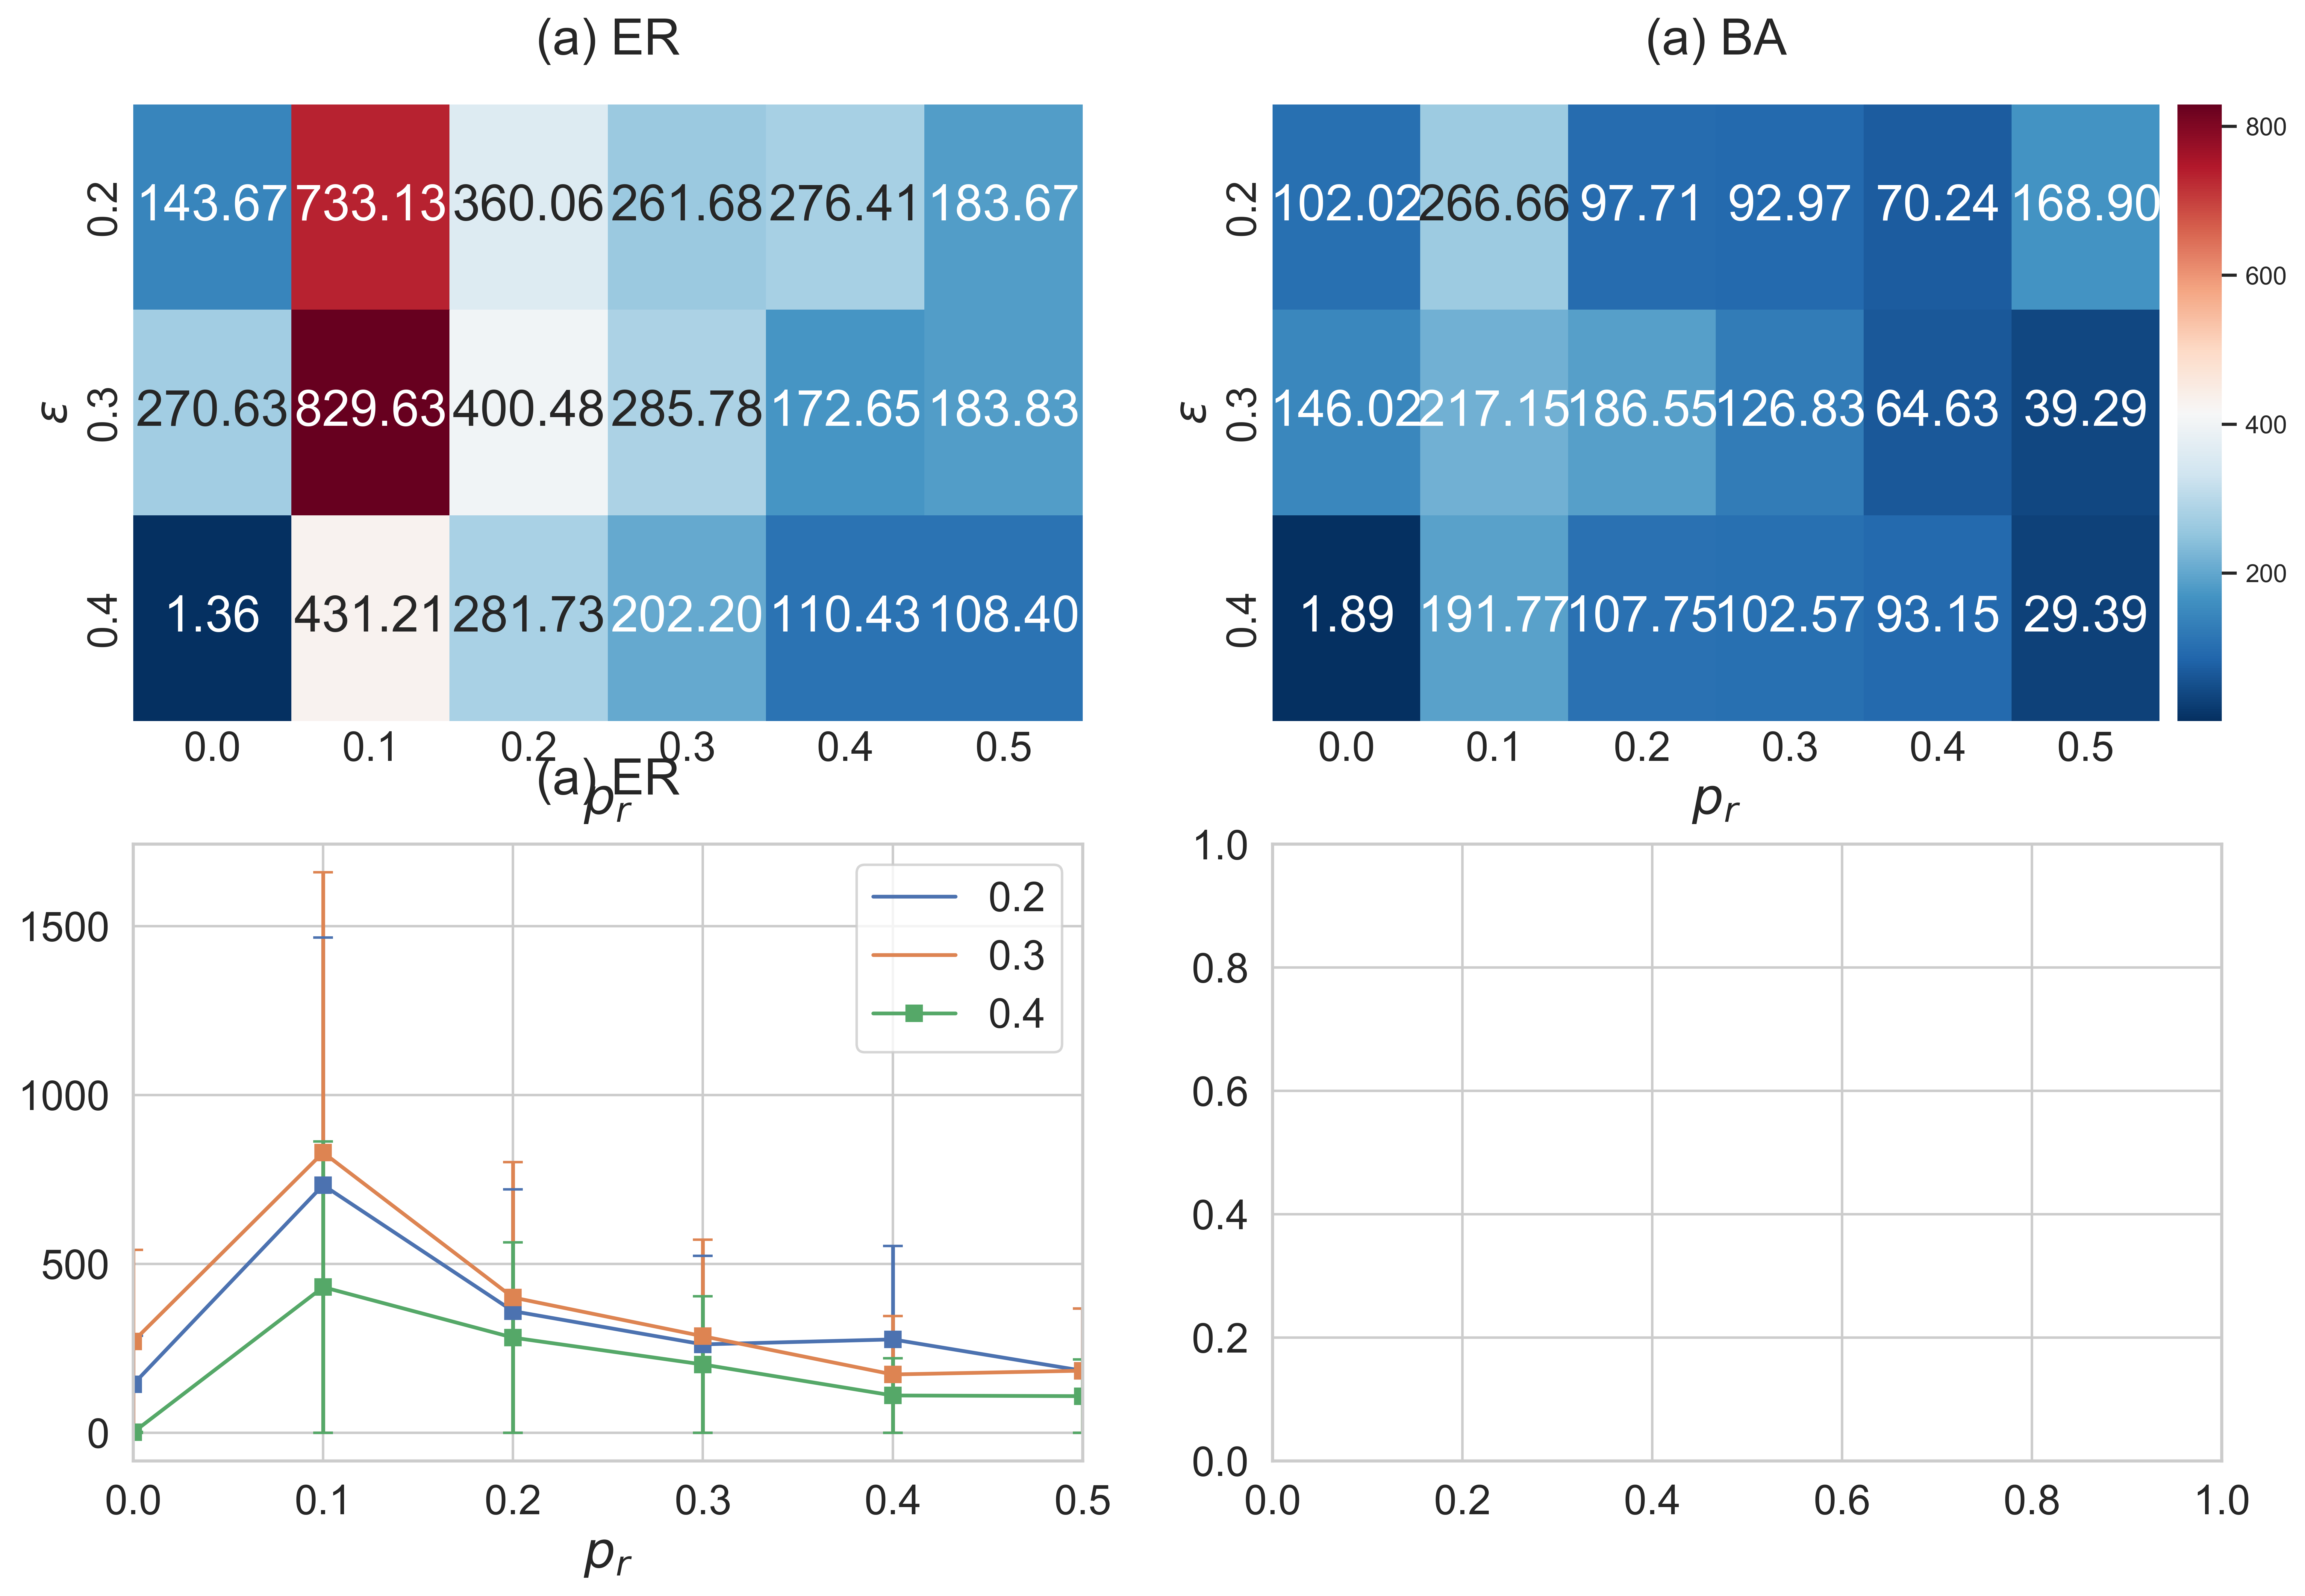

In [77]:
# %matplotlib inline
import tqdm
for measure in tqdm.tqdm(measures):
    stdmeasure = measure.split('_')
    stdmeasure[0] = 'std'
    stdmeasure = '_'.join(stdmeasure)
    heatmapsplot2rows(results, measure, modelname)
    heatmapsplot3rows(results, measure, modelname)
    if not measure.startswith("std"):
        plotdeffuant(results, measure, stdmeasure, modelname)
        graph = "ba"
        heatmapslineplot(results, measure, modelname, graph)
        graph = "er"
        heatmapslineplot(results, measure, modelname, graph)

In [ ]:
modelname = "triangles rewiring"
finalfile = f"{modelname} results.csv"
results = pd.read_csv(f"aggregate/{finalfile}", index_col=[0])
results = results.rename(columns={"10B_avg_entr":"avg_entr_10B", "10B_std_entr":"std_entr_10B"})
results.columns

In [ ]:
# %matplotlib inline
import tqdm
for measure in tqdm.tqdm(measures):
    stdmeasure = measure.split('_')
    stdmeasure[0] = 'std'
    stdmeasure = '_'.join(stdmeasure)
    plotdeffuant(results, measure, stdmeasure, modelname)
    heatmapsplot2rows(results, measure, modelname)
    heatmapsplot3rows(results, measure, modelname)
    if not measure.startswith("std"):
        graph = "ba"
        heatmapslineplot(results, measure, modelname, graph)
        graph = "er"
        heatmapslineplot(results, measure, modelname, graph)

In [ ]:
def from_res_to_iterations(name, nr):
    res = open("res/new/{} nr{}.csv".format(name, nr))
    iterations = []
    it = 0
    for line in res.readlines():
        iterations.append(dict())
        iterations[it]['iteration'] = it
        iterations[it]['status'] = dict()

        opinions = line.strip().split(',')

        for i in range(len(opinions)):
            iterations[it]['status'][i] = float(opinions[i])
            iterations[it]['node_count'] = {0: 0},
            iterations[it]['status_delta'] = {0: 0}

        it += 1
        
    return iterations

In [ ]:
def evolution(iterations, fig, ax):

    """
    Generates the plot

    :param filename: Output filename
    :param percentile: The percentile for the trend variance area
    """

    nodes2opinions = {}
    node2col = {}

    last_it = iterations[-1]['iteration'] + 1
    last_seen = {}

    for it in iterations:
        sts = it['status']
        its = it['iteration']
        for n, v in sts.items():
            if n in nodes2opinions:
                last_id = last_seen[n]
                last_value = nodes2opinions[n][last_id]

                for i in range(last_id, its):
                    nodes2opinions[n][i] = last_value

                nodes2opinions[n][its] = v
                last_seen[n] = its
            else:
                nodes2opinions[n] = [0]*last_it
                nodes2opinions[n][its] = v
                last_seen[n] = 0
                if v < 0.33:
                    node2col[n] = '#3776ab'
                elif 0.33 <= v <= 0.66:
                    node2col[n] = '#FFA500'
                else:
                    node2col[n] = '#FF0000'

    mx = 0
    for k, l in future.utils.iteritems(nodes2opinions):
        if mx < last_seen[k]:
            mx = last_seen[k]
        x = list(range(0, last_seen[k]))
        y = l[0:last_seen[k]]
        ax.plot(x, y, lw=1, alpha=0.25, color=node2col[k])
    
    ax.set_ylim(-0.1, 1.1)
    # ax.set_xlim(0, 1000)
    ax.tick_params(axis='both', which='major', labelsize=4, pad=0)                
    # plt.grid(axis = 'both', which='both')
    # plt.tight_layout()


def finaldistribution(name, nr, ax):
    sns.set_style("whitegrid")
    jsonfile = open(f'finals/final_opinions {name}.json')
    data = json.load(jsonfile)
    finalops = list(data[str(nr)])
    x = [i for i in range(100)]
    y = sorted(finalops)    
    node2col = {}
    for node in x:
        if y[node] < 0.33:
            node2col[node] = '#3776ab'
        elif 0.33 <= y[node] <= 0.66:
            node2col[node] = '#FFA500'
        else:
            node2col[node] = '#FF0000'
    for node in x:
        ax.scatter(x[node], y[node], s = 0.2, c = node2col[node])
    ax.set_ylim(-0.1, 1.1)
    ax.tick_params(axis='both', which='major', labelsize=3, pad=2)    
    ax.set_ylabel(r'$opinion$', fontsize=3)
    ax.set_xlabel(r'$node$', fontsize=3)
    plt.grid(axis = 'both', which='both')
    plt.tight_layout()

def finalhistogram(name, nr, ax):
    jsonfile = open(f'finals/final_opinions {name}.json')
    data = json.load(jsonfile)
    finalops = list(data[str(nr)])
    sns.histplot(data=finalops, ax=ax)
    ax.tick_params(axis='both', which='major', labelsize=3, pad=2)    
    ax.set_ylabel(r'$count$', fontsize=3)
    ax.set_xlabel(r'$opinion$', fontsize=3)
    ax.set_xlim(-0.01,1.01)
    plt.grid(axis = 'both', which='both')
    plt.tight_layout()

In [ ]:
from tqdm import tqdm
def spaghettigridbye(results, modelname, gams, prs, epss):
    for graph in ["er", "ba"]:
        if graph == "er":
            p = 0.1
        else:
            p=5
        for e in epss:
            with tqdm(total=len(prs)*len(gams)) as pbar:
                fig, axes = plt.subplots(nrows=len(prs), ncols=len(gams), figsize=(len(gams), len(prs)), dpi=600, sharey=True)
                row=0
                for pr in prs:
                    col=0
                    for g in gams: 
                        name = f'{modelname} {graph}{p} pr{pr} e{e} g{g} mi100000'
                        nr = 0
                        with open(f"res/{name} nr{nr}.pickle", 'rb') as file:
                            iterations = pickle.load(file)
                        evolution(iterations, fig=fig, ax=axes[row,col])
                        col+=1
                        pbar.update(1)
                    row+=1
                fig.text(0.5, 0.04, r'$p_{r}$', ha='center')
                fig.text(0.04, 0.5, r'$\gamma$', va='center', rotation='vertical')
                plt.suptitle("{}".format(graph))
                plt.show()
#                     plt.savefig(f"plots/aggregate/evolution/evolutiongrid {modelname} {graph}{p} gr0.0 e{e} mi100000.png")
                plt.close()
                    

In [ ]:
from tqdm import tqdm
def spaghettigridnew(results, modelname, gams, prs, epss):
    for graph in ["er", "ba"]:
        if graph == "er":
            p = 0.1
        else:
            p=5
        g = 0.0
        nr = 0
        row=0
        fig, axes = plt.subplots(nrows=len(epss), ncols=len(prs), figsize=(len(prs), len(epss)), dpi=600, sharey=True)
        with tqdm(total=len(prs)*len(epss)) as pbar:
            for e in epss:
                col=0
                for pr in prs:
                    name = f'{modelname} {graph}{p} pr{pr} e{e} g{g} mi100000'
                    with open(f"res/{name} nr{nr}.pickle", 'rb') as file:
                        iterations = pickle.load(file)
                    evolution(iterations, fig=fig, ax=axes[row,col])
                    col+=1
                    pbar.update(1)
                row+=1
        fig.text(0.5, 0.04, r'$p_{r}$', ha='center')
        fig.text(0.04, 0.5, r'$\epsilon$', va='center', rotation='vertical')
#         plt.savefig(f"plots/aggregate/evolution/evolutiongrid {modelname} {graph}{p} gr0.0 g{g} mi100000.png")
        plt.show()
        plt.close()

In [ ]:
def finaldistributiongridbye(results, modelname, gams, prs, epss):
    graphs = ['er', 'ba']
    sns.set_style("whitegrid")
    for graph in graphs:
        if graph == "er":
            p = 0.1
        else:
            p = 5
        for e in epss:
            if not os.path.exists(f"plots/distributiongrid {modelname} {graph}{p} e{e} mi100000.png"):
                with tqdm(total=len(prs)*len(gams)) as pbar:
                    fig, axes = plt.subplots(nrows=len(prs), ncols=len(gams), figsize=(len(gams), len(prs)), dpi=600, sharey=True, sharex=True)
                    row=0
                    for pr in prs:
                        col=0
                        for g in gams:     
                            name = f'{modelname} {graph}{p} pr{pr} e{e} g{g} mi100000'
                            finaldistribution(name, 1, axes[row, col])
                            col+=1
                            pbar.update(1)
                        row+=1
                    name = f'{modelname} {graph}{p} e{e}'
                    plt.savefig(f"plots/distributiongrid {modelname} {graph}{p} e{e} mi100000.png")
                    plt.close()

In [ ]:
def finalhistgridbye(results, modelname, gams, prs, epss):
    graphs = ['er', 'ba']
    for graph in graphs:
        if graph == "er":
            p = 0.1
        else:
            p = 5
        for e in epss:
            if not os.path.exists(f"plots/histogrid {modelname} {graph}{p} e{e} mi100000.png"):
                with tqdm(total=len(prs)*len(gams)) as pbar:
                    fig, axes = plt.subplots(nrows=len(prs), ncols=len(gams), figsize=(len(gams), len(prs)), dpi=600, sharey=True, sharex=True)
                    row=0
                    for pr in prs:
                        col=0
                        for g in gams:     
                            name = f'{modelname} {graph}{p} pr{pr} e{e} g{g} mi100000'
                            finalhistogram(name, 1, axes[row, col])
                            col+=1
                            pbar.update(1)
                        row+=1
                    name = f'{modelname} {graph}{p} e{e}'
                    plt.savefig(f"plots/histogrid {modelname} {graph}{p} e{e} mi100000.png")
                    plt.close()

In [ ]:
fs = 1.2
for measure in ['avg_ncluster_01']:
    heatmapsplotdeffuant(results, measure, modelname, fs)

for measure in measures:
    heatmapsplot(results, measure, modelname)

finaldistributiongridbye(results, modelname, gams, prs, epss)

In [ ]:
spaghettigridbye(results, modelname, gams, prs, epss)

In [ ]:
modelname

In [ ]:
max_it = 100000 #maximum number of iterations for run
for graphname in ["er", "ba"]:
    if graphname == "er":
        graph = nx.erdos_renyi_graph(250, 0.1)
        p = 0.1
    else:
        graph = nx.barabasi_albert_graph(250, 5)
        p=5
    for e in epss:
        for pr in prs:
            for g in gams: 
                if modelname == "rewiring":
                    model = op.AdaptiveAlgorithmicBiasModel(graph)
                elif modelname == "triangles rewiring":
                    model = op.AdaptivePeerPressureAlgorithmicBiasModel(graph)
                config = mc.Configuration()
                config.add_model_parameter("epsilon", e)
                config.add_model_parameter("gamma", g)
                config.add_model_parameter("p", pr)
                model.set_initial_status(config)
                for nr in range(1):
                    name = f'{modelname} {graphname}{p} pr{pr} e{e} g{g} mi100000'
                    if not os.path.exists(f"res/{name} nr{nr}.pickle"):
                        print(f"simulating {name}")
                        iterations = model.steady_state(max_iterations=max_it, nsteady=1000, sensibility=0.00001, node_status=True, progress_bar=True)
                        with open(f"res/{name} nr{nr}.pickle", 'wb') as file:
                            pickle.dump(iterations, file)
                        print(f"evolution {name} nr{nr} done")

In [ ]:
max_it = 100000 #maximum number of iterations for run
for graphname in ["er", "ba"]:
    if graphname == "er":
        graph = nx.erdos_renyi_graph(250, 0.1)
        p = 0.1
    else:
        graph = nx.barabasi_albert_graph(250, 5)
        p=5
    for e in epss:
        for pr in prs:
            for g in gams: 
                if modelname == "rewiring":
                    model = op.AdaptiveAlgorithmicBiasModel(graph)
                elif modelname == "triangles rewiring":
                    model = op.AdaptivePeerPressureAlgorithmicBiasModel(graph)
                config = mc.Configuration()
                config.add_model_parameter("epsilon", e)
                config.add_model_parameter("gamma", g)
                config.add_model_parameter("p", pr)
                model.set_initial_status(config)
                for nr in range(1):
                    name = f'{modelname} {graphname}{p} pr{pr} e{e} g{g} mi100000'
                    if not os.path.exists(f"plots/evolution/{name} nr{nr}.png"):
                        print(f"plotting {name}")
                        with open(f"res/{name} nr{nr}.pickle", 'rb') as file:
                            iterations = pickle.load(file)
                        fig, ax = plt.subplots()
                        evolution(iterations, fig=fig, ax=ax)
                        fig.savefig(f"plots/evolution/{name} nr{nr}.png")
                        print(f"evolution {name} nr{nr} done")

def heatmapsplotdeffuant(results, measure, modelname, fs):

    params = ['graph','nruns','n', 'k','gam','eps', 'pr']
    paramsnames = ['graph', 'nruns', 'n', 'k', '$\gamma$', '$\epsilon$', '$p_r$']
    parmapping = dict(zip(params, paramsnames))

    sns.set_style("whitegrid")
    sns.set(font_scale=fs)

    with sns.axes_style("whitegrid"):

        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6.3), dpi=600, sharey=True, sharex=True)
        fmt = ".2f"
        annot = True
        if measure=='avg_niter':
            fmt = ".0f"

        list_of_labels = ["a", "b", "c", "d", "e", "f", "g", "h", "i"]
        lab = 0
        i = 0
        for val in ["er", "ba"]:
            data = results[results['gam']==0.0]
            data2 = data[data["graph"] == val]
            df = data2.pivot("eps", "pr", measure)
            a=sns.heatmap(df, vmin=min(data[measure]), vmax=max(data[measure]), cmap='RdBu_r', cbar=False, fmt=fmt, annot=annot, ax= axes[i])
            axes[i].set_xlabel(r'{}'.format(parmapping["pr"]), fontsize=20)
            axes[i].set_title(r'({}) {}'.format(list_of_labels[lab], val.upper()), fontsize=20, pad=20)
            axes[i].set_ylabel('')
            lab +=1
            i+=1
        axes[0].set_ylabel(r'{}'.format(parmapping["eps"]), fontsize=25)
        for ax in axes.flat:
            ax.tick_params(axis='x', which='major', pad=-2)
            ax.tick_params(axis='y', which='major', pad=-2)
            print(ax)
            print(ax.get_children()[0])
        cax = fig.add_axes([0.92, 0.22, 0.01, 0.6])
        cbar = fig.colorbar(ax.get_children()[0], cax=cax, orientation="vertical")
        for t in cbar.ax.get_yticklabels():
            t.set_fontsize(10)
        cbar.outline.set_visible(False)
        cbar.ax.tick_params()
        plt.show()
        plt.close()
